### Load data and show any sample

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('sample/Data_Entry_2017.csv')
# df = pd.read_csv('sample/sample_labels.csv')

In [3]:
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000001_000.png,Cardiomegaly,0,1,058Y,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,058Y,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,058Y,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,081Y,M,PA,2500,2048,0.171,0.171
4,00000003_000.png,Hernia,0,3,081Y,F,PA,2582,2991,0.143,0.143


In the meantime, we can see that the data is not being processed yet, so we will process it before further analysis

### Preprocessing

We will separate diseases from 14 diseases and no diseases. Next, transfer the age data to the correct numeric format

In [4]:
diseases = ['Cardiomegaly','Emphysema','Effusion','Hernia','Nodule','Pneumothorax','Atelectasis','Pleural_Thickening','Mass','Edema','Consolidation','Infiltration','Fibrosis','Pneumonia']
#split diseases
for disease in diseases :
    df[disease] = df['Finding Labels'].apply(lambda x: 1 if disease in x else 0).astype(int)

df['No_Finding']=df['Finding Labels'].apply(lambda x: 1 if 'No Finding' in x else 0)
df['Finding']=df['Finding Labels'].apply(lambda x: 0 if 'No Finding' in x else 1)

In [5]:
#remove last character in Age
df['Age']=df['Patient Age'].apply(lambda x: x[:-1]).astype(int)
df['Age Type']=df['Patient Age'].apply(lambda x: x[-1:])

np.unique(df['Age Type'], return_counts=True)

(array(['D', 'M', 'Y'], dtype=object), array([     1,     26, 112093]))

Seeing that there is an age case is calculated in Day, and 26 case is in Month, so it's all in Year

In [6]:
df.loc[df['Age Type']=='M',['Age']] = df[df['Age Type']=='M']['Age'].apply(lambda x: round(x/12.)).astype(int)
df.loc[df['Age Type']=='D',['Age']] = df[df['Age Type']=='D']['Age'].apply(lambda x: round(x/365.)).astype(int)

In [7]:
df.describe()

,Follow-up #,Patient ID,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y,Cardiomegaly,Emphysema,Effusion,Hernia,...,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia,No_Finding,Finding,Age
count,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,...,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000
mean,8.573751,14346.381743,2646.078844,2486.438842,0.155649,0.155649,0.024724,0.022440,0.118685,0.002025,...,0.030191,0.051249,0.020540,0.041625,0.177221,0.015037,0.012067,0.538816,0.461184,46.898020
std,15.406320,8403.876972,341.246429,401.268227,0.016174,0.016174,0.155282,0.148111,0.323419,0.044950,...,0.171113,0.220505,0.141841,0.199732,0.381857,0.121702,0.109188,0.498493,0.498493,16.847488
min,0.000000,1.000000,1143.000000,966.000000,0.115000,0.115000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7310.750000,2500.000000,2048.000000,0.143000,0.143000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000
50%,3.000000,13993.000000,2518.000000,2544.000000,0.143000,0.143000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,49.000000
75%,10.000000,20673.000000,2992.000000,2991.000000,0.168000,0.168000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,59.000000
max,183.000000,30805.000000,3827.000000,4715.000000,0.198800,0.198800,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,414.000000


We see something special in the Age field, which is max 414, no one living up to 414 years is recorded, this is certainly a statistical error in the process.

In [8]:
df['Age'].sort_values(ascending=False).head(20)

46965     414
86264     413
91369     412
20852     412
85404     412
84810     411
104590    155
101194    155
98495     154
95794     153
74884     152
78795     151
58650     150
62929     149
55742     148
48284     148
58464      95
578        94
74736      94
74735      94
Name: Age, dtype: int64

In [9]:
df = df.drop(df['Age'].sort_values(ascending=False).head(16).index)

### Number of each diseases by patient gender

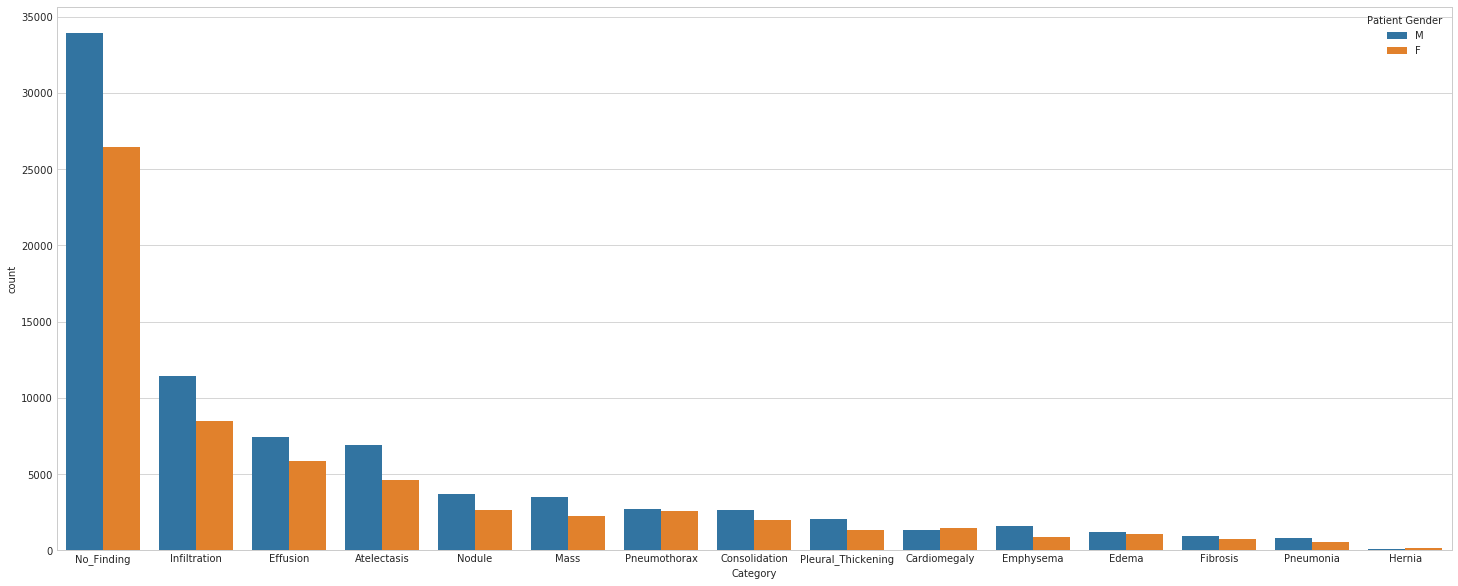

In [10]:
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
sns.set_style('whitegrid')
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
ax = plt.subplot()

data = pd.melt(df, id_vars=['Patient Gender'], value_vars = list(diseases + ['No_Finding']), var_name = 'Category', value_name = 'Count')
data = data.loc[data.Count>0]

sns.countplot(x='Category',hue='Patient Gender',data=data, ax=ax, order = data['Category'].value_counts().index)

### Distribution of Patient Gender and Finding diseases

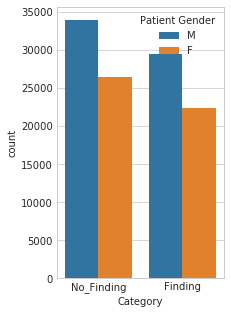

In [11]:
plt.figure(figsize=(3,5))
ax = plt.subplot()

data = pd.melt(df, id_vars=['Patient Gender'], value_vars = list(['Finding', 'No_Finding']), var_name = 'Category', value_name = 'Count')
data = data.loc[data.Count>0]

sns.countplot(x='Category',hue='Patient Gender',data=data, ax=ax, order = data['Category'].value_counts().index)

### Distribution of Patient Gender and View Position

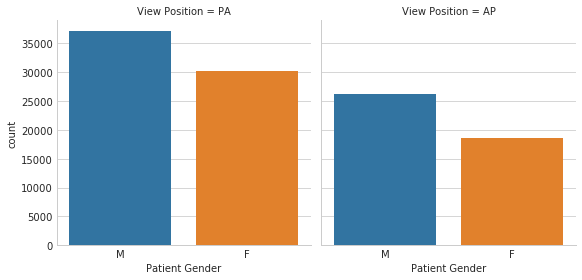

In [12]:
sns.factorplot(x="Patient Gender", col="View Position",data=df, kind="count");

### Different images of view position in same patient

In [13]:
df[df['Patient ID'] == 61]

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,...,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia,No_Finding,Finding,Age,Age Type
264,00000061_000.png,Infiltration|Nodule,0,61,077Y,M,PA,3056,2500,0.139,...,0,0,0,1,0,0,0,1,77,Y
265,00000061_001.png,Mass,1,61,077Y,M,PA,2530,2717,0.143,...,1,0,0,0,0,0,0,1,77,Y
266,00000061_002.png,Effusion,2,61,077Y,M,PA,2992,2991,0.143,...,0,0,0,0,0,0,0,1,77,Y
267,00000061_003.png,Effusion|Pleural_Thickening,3,61,077Y,M,PA,3056,2472,0.139,...,0,0,0,0,0,0,0,1,77,Y
268,00000061_004.png,Atelectasis|Effusion,4,61,077Y,M,AP,3056,2544,0.139,...,0,0,0,0,0,0,0,1,77,Y
269,00000061_005.png,Effusion|Infiltration,5,61,077Y,M,AP,3056,2544,0.139,...,0,0,0,1,0,0,0,1,77,Y
270,00000061_006.png,Effusion,6,61,077Y,M,AP,3056,2544,0.139,...,0,0,0,0,0,0,0,1,77,Y
271,00000061_007.png,Effusion,7,61,078Y,M,AP,2500,2048,0.168,...,0,0,0,0,0,0,0,1,78,Y
272,00000061_008.png,Effusion,8,61,078Y,M,AP,2500,2048,0.168,...,0,0,0,0,0,0,0,1,78,Y
273,00000061_009.png,Effusion|Infiltration,9,61,077Y,M,AP,3056,2544,0.139,...,0,0,0,1,0,0,0,1,77,Y


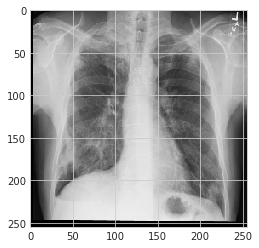

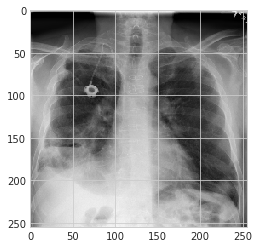

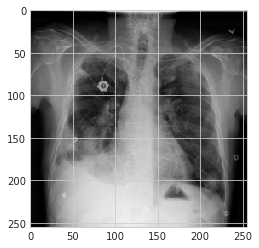

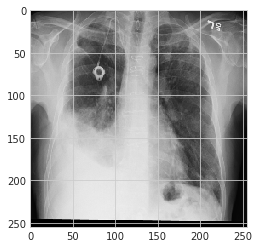

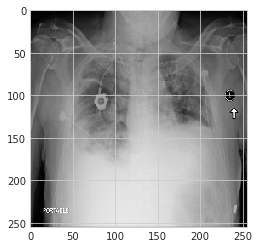

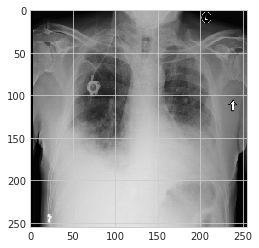

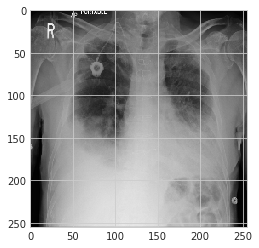

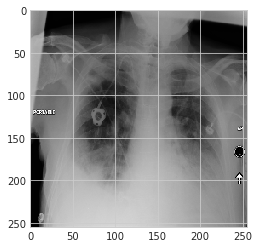

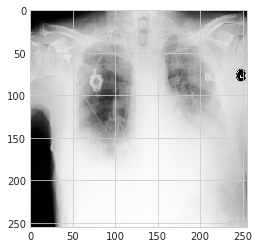

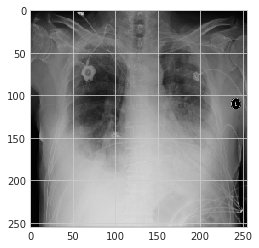

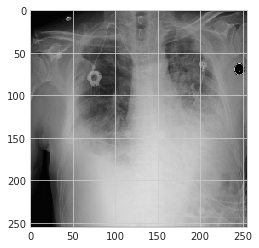

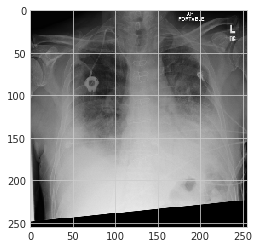

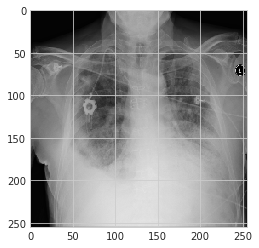

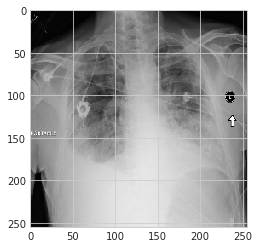

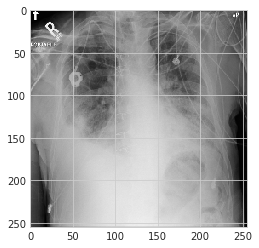

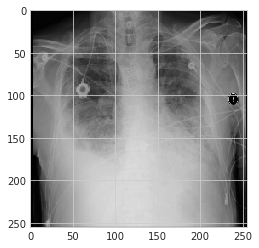

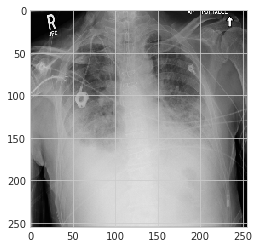

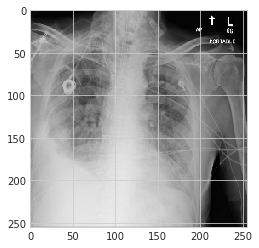

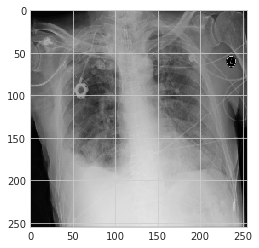

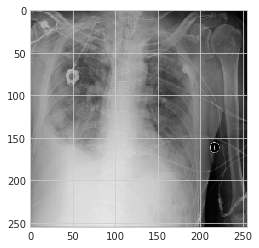

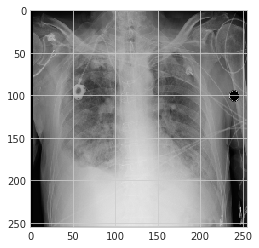

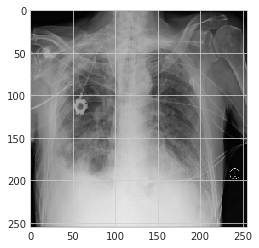

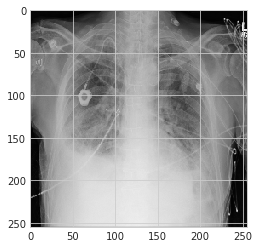

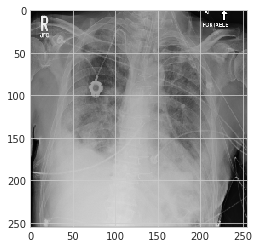

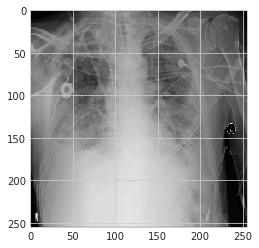

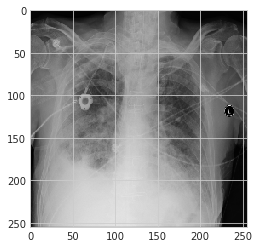

In [14]:
import matplotlib.pyplot as plt 
import cv2
%matplotlib inline

def show_image(img_path):
    image = cv2.imread(img_path)
    img = cv2.resize(image, (256, 256))
    plt.imshow(img)
    plt.show()

for img_path in df[df['Patient ID'] == 61]['Image Index'].tolist():
    show_image('sample/images/' + img_path)

### Age distribution

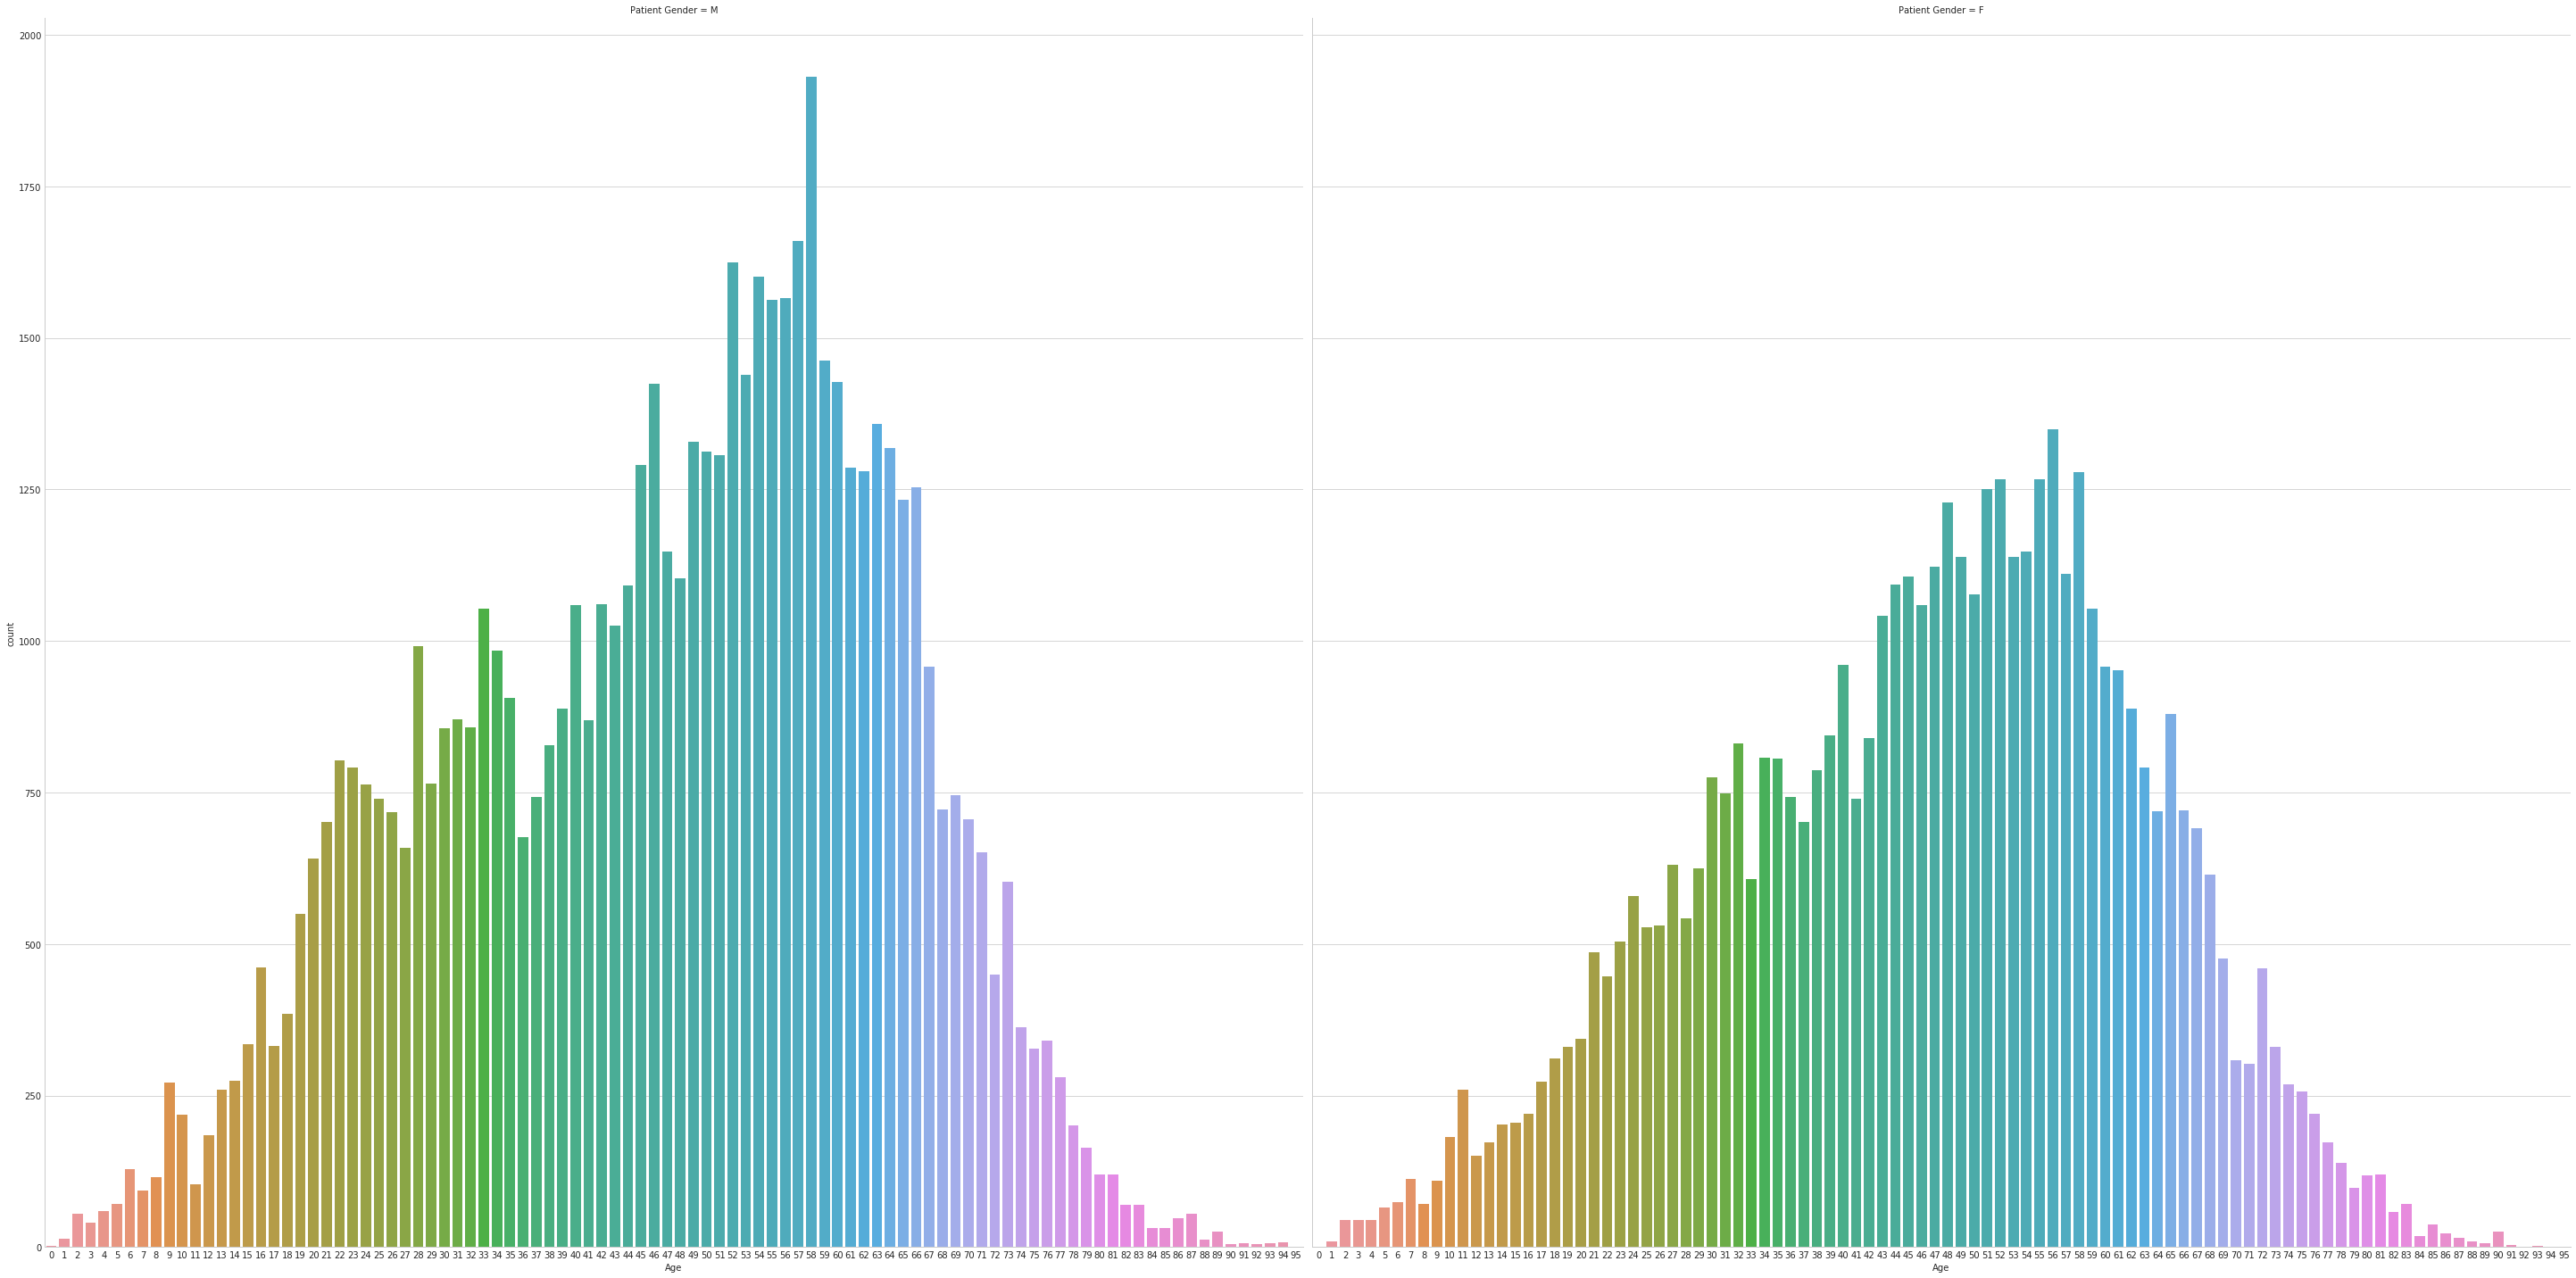

In [15]:
sns.factorplot(x="Age", col="Patient Gender",data=df, kind="count",size=20);

### Distribution of Age for each disease

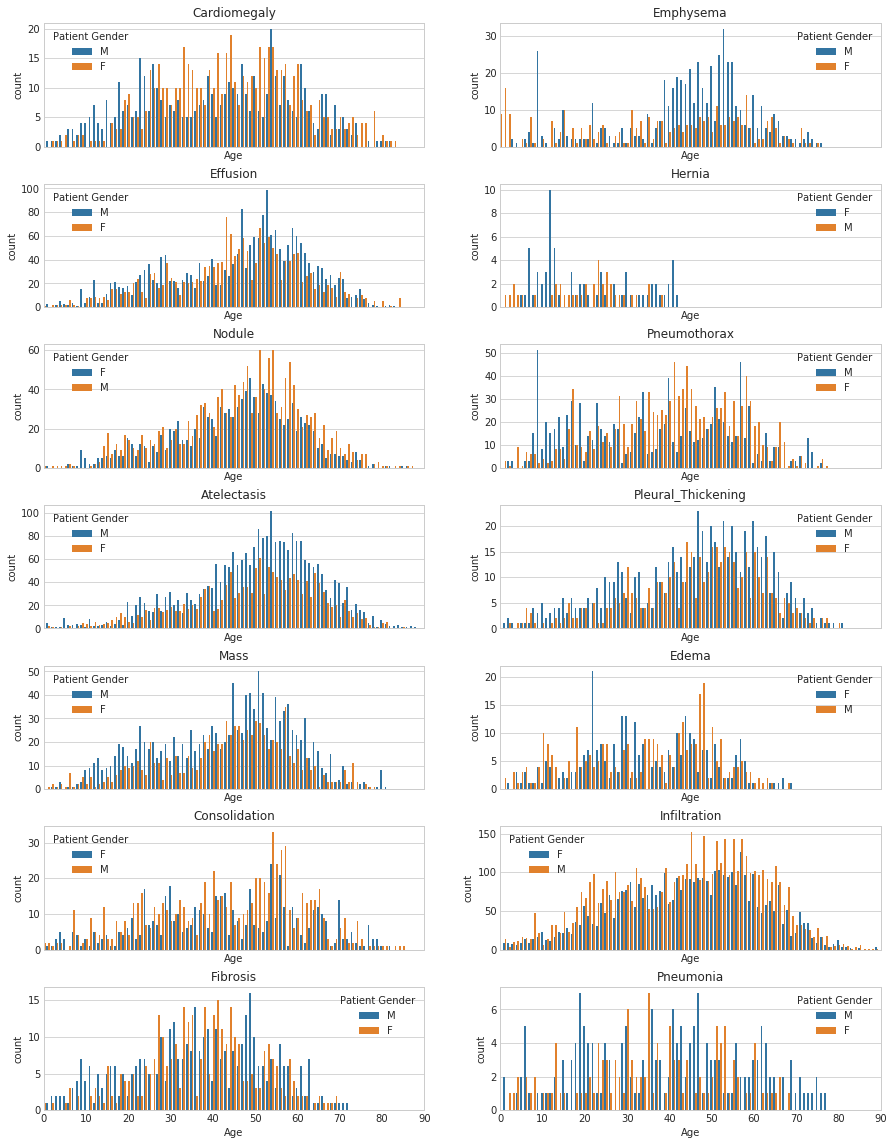

In [16]:
f, axarr = plt.subplots(7, 2, sharex=True,figsize=(15, 20))

i=0
j=0
x=np.arange(0,100,10)
for pathology in diseases :
    g=sns.countplot(x='Age', hue="Patient Gender",data=df[df['Finding Labels']==pathology], ax=axarr[i, j])
    axarr[i, j].set_title(pathology)   
    g.set_xlim(0,90)
    g.set_xticks(x)
    g.set_xticklabels(x)
    j=(j+1)%2
    if j==0:
        i=(i+1)%7
f.subplots_adjust(hspace=0.3)